In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score as  OA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
type ="regression"
if type =="classif":
    # Create data 
    X, y = make_blobs(n_samples=100,
                      centers=3,
                      n_features=2,
                      random_state=0)
    
    # Generate points for the bounding box
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
else:
    def function_to_be_estimated(x):
        return x*0.5 + 0.5*np.sin(x*2*np.pi/5) + 0.1*np.random.randn(x.shape[0], x.shape[1])
    # Set random seed
    np.random.seed(0)
    n_samples = 50
    X = 10*np.random.rand(n_samples,1)-5
    y = function_to_be_estimated(X)
    t = np.linspace(X.min()-10, X.max()+10, num=100).reshape(-1,1)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=10)

In [3]:
def plot_classif(model, xx, yy):
    # Predict posterior probability and class
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    y_pred = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot the results
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
    for c in range(3):
        cs = axs[c].contour(xx, yy, Z[:,c].reshape(xx.shape), [0.25, 0.5, 0.75])
        axs[c].scatter(X_test[:, 0],
                            X_test[:, 1],
                            c=y_test)
        axs[c].clabel(cs, inline=1, fontsize=10)

    axs[-1].contourf(xx, yy, y_pred.reshape(xx.shape))
    axs[-1].scatter(X_test[:, 0],
                    X_test[:, 1],
                    c=y_test)
def plot_regression(model, t):
    plt.figure()
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test)
    plt.plot(t, model.predict(t), 'k')

/tmp/ipykernel_268010/2094805899.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/tmp/ipykernel_268010/2094805899.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/tmp/ipykernel_268010/2094805899.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/tmp/ipykernel_268010/2094805899.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/tmp/ipykernel_268010/2094805899.py:7: DataConversionWarning: A column-vector y was passed when a 1d arr

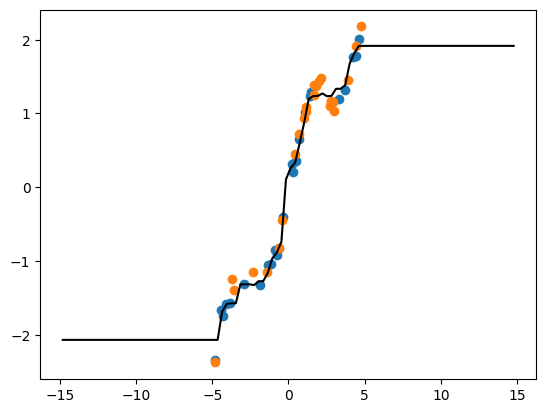

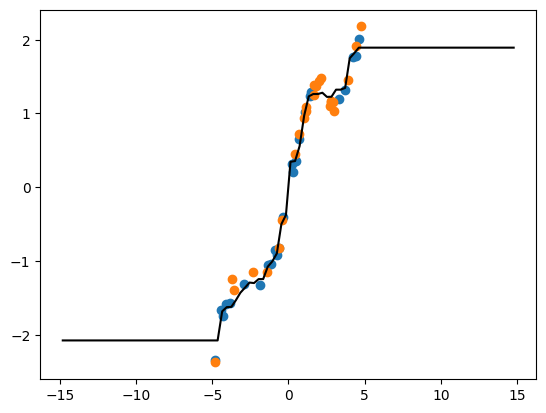

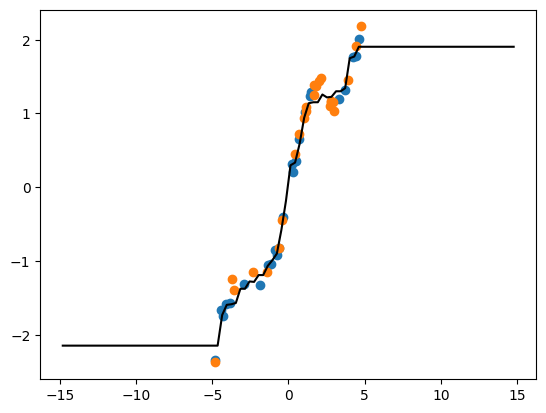

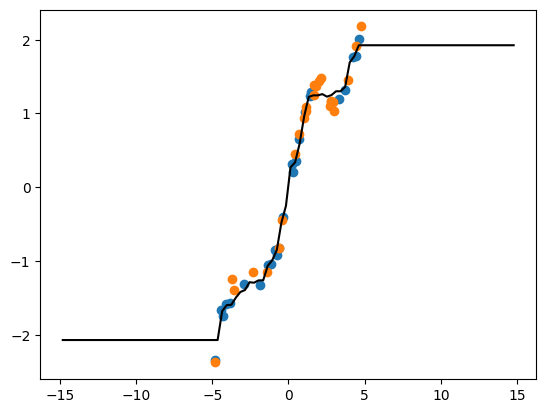

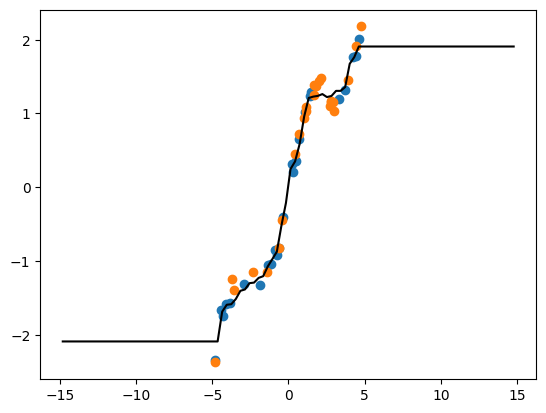

In [4]:
precision_test, precision_train = [], []
for n_estimators in [5, 10, 20, 50, 100]:
    if type == "classif":
        model = RandomForestClassifier(n_estimators=n_estimators)
    else:
        model = RandomForestRegressor(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    precision_train.append(model.score(X_train, y_train))
    precision_test.append(model.score(X_test, y_test))
    
    # Plot results
    if type == "classif":
        plot_classif(model, xx,yy)
    else: 
        plot_regression(model, t)
    

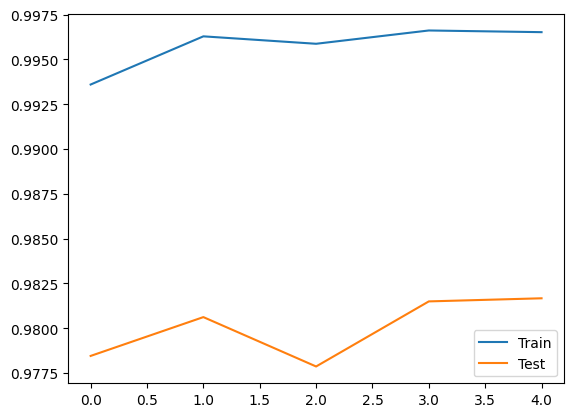

In [5]:
plt.plot(precision_train)
plt.plot(precision_test)
plt.legend(["Train", "Test"])